# Plotting

In [1]:
import anjl
import plotly.io
import zarr
from scipy.spatial.distance import squareform
import pandas as pd
import numpy as np
from plotly.subplots import make_subplots

plotly.io.renderers.default = "plotly_mimetype+notebook_connected"

## Example 1

In [2]:
D1, _ = anjl.data.example_1()
D1

array([[ 0.,  4.,  5., 10.],
       [ 4.,  0.,  7., 12.],
       [ 5.,  7.,  0.,  9.],
       [10., 12.,  9.,  0.]], dtype=float32)

In [3]:
Z1d = anjl.dynamic_nj(D1)
Z1d

array([[0. , 1. , 1. , 3. , 2. ],
       [2. , 4. , 2. , 2. , 3. ],
       [3. , 5. , 3.5, 3.5, 4. ]], dtype=float32)

In [4]:
Z1r = anjl.rapid_nj(D1)
Z1r

array([[0. , 1. , 1. , 3. , 2. ],
       [2. , 4. , 2. , 2. , 3. ],
       [3. , 5. , 3.5, 3.5, 4. ]], dtype=float32)

In [5]:
D1

array([[ 0.,  4.,  5., 10.],
       [ 4.,  0.,  7., 12.],
       [ 5.,  7.,  0.,  9.],
       [10., 12.,  9.,  0.]], dtype=float32)

In [6]:
Z1 = anjl.canonical_nj(D1)
Z1

array([[0. , 1. , 1. , 3. , 2. ],
       [2. , 4. , 2. , 2. , 3. ],
       [3. , 5. , 3.5, 3.5, 4. ]], dtype=float32)

In [7]:
from anjl._canonical import square_to_condensed, setup_divergence, condensed_index

In [8]:
n = D1.shape[0]
for i in range(n):
    for j in range(i + 1, n):
        print(i, j, condensed_index(i, j, n))
        print(i, j, condensed_index(j, i, n))

0 1 0
0 1 0
0 2 1
0 2 1
0 3 2
0 3 2
1 2 3
1 2 3
1 3 4
1 3 4
2 3 5
2 3 5


In [9]:
D1

array([[ 0.,  4.,  5., 10.],
       [ 4.,  0.,  7., 12.],
       [ 5.,  7.,  0.,  9.],
       [10., 12.,  9.,  0.]], dtype=float32)

In [88]:
dist = square_to_condensed(D1)
dist

array([ 4.,  5., 10.,  7., 12.,  9.], dtype=float32)

In [11]:
D1.sum(axis=1)

array([19., 23., 21., 31.], dtype=float32)

In [102]:
setup_divergence(dist, D1.shape[0])

array([19., 23., 21., 31.], dtype=float32)

In [109]:
anjl.canonical_nj(D1), D1

(array([[0. , 1. , 1. , 3. , 2. ],
        [2. , 4. , 2. , 2. , 3. ],
        [3. , 5. , 3.5, 3.5, 4. ]], dtype=float32),
 array([[ 0.,  4.,  5., 10.],
        [ 4.,  0.,  7., 12.],
        [ 5.,  7.,  0.,  9.],
        [10., 12.,  9.,  0.]], dtype=float32))

In [108]:
anjl.canonical_nj(dist)

array([[0. , 1. , 1. , 3. , 2. ],
       [2. , 4. , 2. , 2. , 3. ],
       [3. , 5. , 3.5, 3.5, 4. ]], dtype=float32)

In [20]:
print(anjl.to_string(Z1d))
print(anjl.to_string(Z1r))
print(anjl.to_string(Z1))

Node(id=6, dist=0, count=4)
    Leaf(id=3, dist=3.5)
    Node(id=5, dist=3.5, count=3)
        Leaf(id=2, dist=2.0)
        Node(id=4, dist=2.0, count=2)
            Leaf(id=0, dist=1.0)
            Leaf(id=1, dist=3.0)
Node(id=6, dist=0, count=4)
    Leaf(id=3, dist=3.5)
    Node(id=5, dist=3.5, count=3)
        Leaf(id=2, dist=2.0)
        Node(id=4, dist=2.0, count=2)
            Leaf(id=0, dist=1.0)
            Leaf(id=1, dist=3.0)
Node(id=6, dist=0, count=4)
    Leaf(id=0, dist=0.5)
    Node(id=5, dist=0.5, count=3)
        Leaf(id=1, dist=3.0)
        Node(id=4, dist=2.0, count=2)
            Leaf(id=2, dist=2.0)
            Leaf(id=3, dist=7.0)


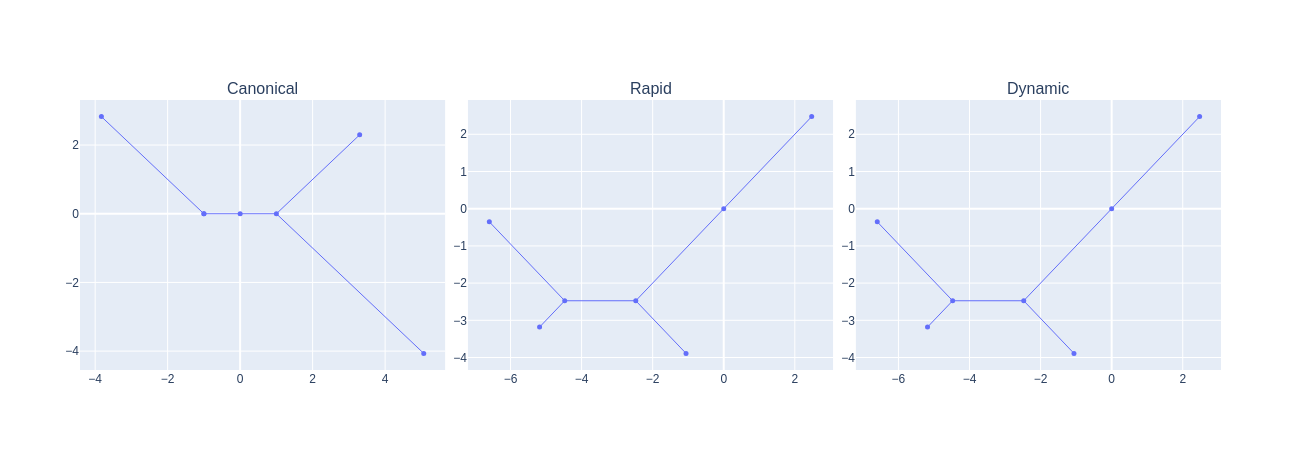

In [23]:
figd = anjl.plot(Z1d, marker_size=5, internal_marker_size=5)
figr = anjl.plot(Z1r, marker_size=5, internal_marker_size=5)
figc = anjl.plot(Z1, marker_size=5, internal_marker_size=5)
figures = [figc, figr, figd]
fig = make_subplots(
    rows=1,
    cols=len(figures),
    subplot_titles=["Canonical", "Rapid", "Dynamic"],
    horizontal_spacing=0.02,
    vertical_spacing=0.02,
)
for i, figure in enumerate(figures):
    for trace in range(len(figure["data"])):
        fig.append_trace(figure["data"][trace], row=1, col=i + 1)
fig.update_layout(showlegend=False, height=450, width=1100)
fig

In [ ]:
ld1 = pd.DataFrame.from_records(
    [
        ["A", "apple", "carrot", "pigeon", "Ferrari"],
        ["B", "apple", "pea", "ladybird", "Lamborghini"],
        ["C", "banana", "cabbage", "pigeon", "Landrover"],
        ["D", "mango", "cabbage", "spider", np.nan],
    ],
    columns=["name", "fruit", "vegetable", "animal", "car"],
)
ld1

In [ ]:
anjl.plot(
    Z=Z1,
    leaf_data=ld1,
    hover_name="name",
    hover_data=["fruit", "vegetable", "animal", "car"],
    color="fruit",
    marker_size=20,
    internal_marker_size=5,
    line_width=4,
)

In [ ]:
anjl.plot(
    Z=Z1r,
    leaf_data=ld1,
    hover_name="name",
    hover_data=["fruit", "vegetable", "animal", "car"],
    color="fruit",
    marker_size=20,
    symbol="car",
    internal_marker_size=5,
    line_width=4,
)

In [ ]:
anjl.plot(
    Z=Z1r,
    leaf_data=ld1,
    hover_name="name",
    hover_data=["fruit", "vegetable", "animal", "car"],
    color="car",
    marker_size=20,
    symbol="fruit",
    internal_marker_size=5,
    line_width=4,
)

## Example 2

In [83]:
D2, _ = anjl.data.wikipedia_example()
D2

Z2d = anjl.dynamic_nj(D2)
Z2r = anjl.rapid_nj(D2)
Z2 = anjl.canonical_nj(D2)
Z2

array([[0. , 1. , 2. , 3. , 2. ],
       [2. , 5. , 4. , 3. , 3. ],
       [3. , 6. , 2. , 2. , 4. ],
       [4. , 7. , 0.5, 0.5, 5. ]], dtype=float32)

In [12]:
Z2d

array([[0. , 1. , 2. , 3. , 2. ],
       [2. , 5. , 4. , 3. , 3. ],
       [3. , 6. , 2. , 2. , 4. ],
       [4. , 7. , 0.5, 0.5, 5. ]], dtype=float32)

In [9]:
print(anjl.to_string(Z2d))
print(anjl.to_string(Z2r))
print(anjl.to_string(Z2))

Node(id=8, dist=0, count=5)
    Leaf(id=4, dist=0.5)
    Node(id=7, dist=0.5, count=4)
        Leaf(id=3, dist=2.0)
        Node(id=6, dist=2.0, count=3)
            Leaf(id=2, dist=4.0)
            Node(id=5, dist=3.0, count=2)
                Leaf(id=0, dist=2.0)
                Leaf(id=1, dist=3.0)
Node(id=8, dist=0, count=5)
    Leaf(id=3, dist=1.0)
    Node(id=7, dist=1.0, count=4)
        Leaf(id=4, dist=1.0)
        Node(id=6, dist=2.0, count=3)
            Leaf(id=2, dist=4.0)
            Node(id=5, dist=3.0, count=2)
                Leaf(id=0, dist=2.0)
                Leaf(id=1, dist=3.0)
Node(id=8, dist=0, count=5)
    Leaf(id=4, dist=0.5)
    Node(id=7, dist=0.5, count=4)
        Leaf(id=3, dist=2.0)
        Node(id=6, dist=2.0, count=3)
            Leaf(id=2, dist=4.0)
            Node(id=5, dist=3.0, count=2)
                Leaf(id=0, dist=2.0)
                Leaf(id=1, dist=3.0)


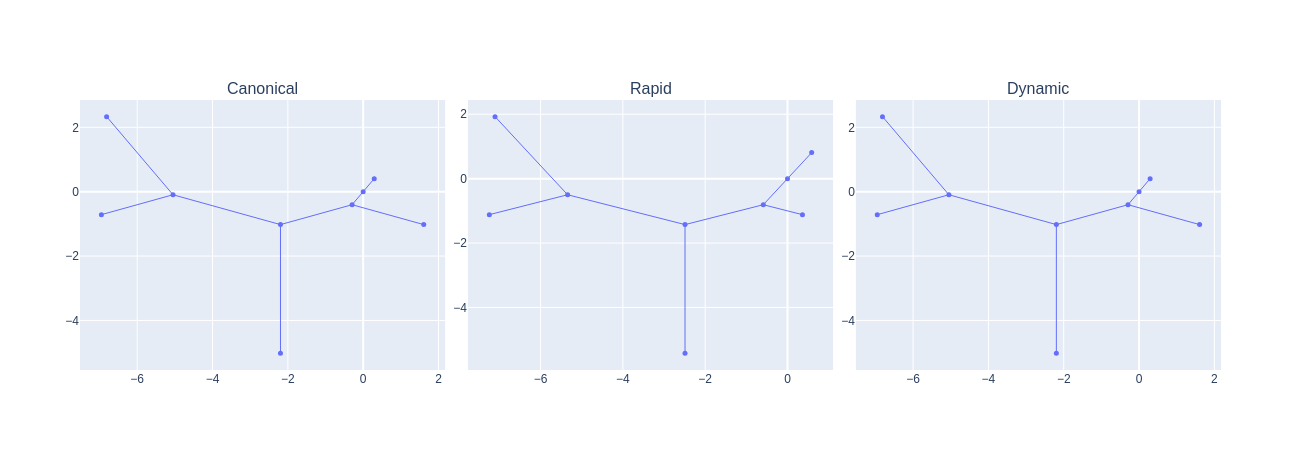

In [10]:
figd = anjl.plot(Z2d, marker_size=5, internal_marker_size=5)
figr = anjl.plot(Z2r, marker_size=5, internal_marker_size=5)
figc = anjl.plot(Z2, marker_size=5, internal_marker_size=5)
figures = [figc, figr, figd]
fig = make_subplots(
    rows=1,
    cols=len(figures),
    subplot_titles=["Canonical", "Rapid", "Dynamic"],
    horizontal_spacing=0.02,
    vertical_spacing=0.02,
)
for i, figure in enumerate(figures):
    for trace in range(len(figure["data"])):
        fig.append_trace(figure["data"][trace], row=1, col=i + 1)
fig.update_layout(showlegend=False, height=450, width=1100)
fig

## Example 3 (small)

In [ ]:
D3, ld3 = anjl.data.mosquitoes()
loc_shuffle = np.random.choice(D3.shape[0], size=D3.shape[0], replace=False)
D3 = D3.take(loc_shuffle, axis=0).take(loc_shuffle, axis=1)
ld3 = ld3.iloc[loc_shuffle].reset_index(drop=True)
D3.shape

In [ ]:
Z3d = anjl.dynamic_nj(D3)
Z3r = anjl.rapid_nj(D3)
Z3 = anjl.canonical_nj(D3)

In [ ]:
color = "taxon"
params3 = dict(
    line_width=1,
    marker_size=4,
    count_sort=True,
    color=color,
    hover_name="sample_id",
    leaf_data=ld3,
    category_orders={color: np.unique(ld3[color])},
    render_mode="svg",
)
figd = anjl.plot(Z3d, **params3)
figr = anjl.plot(Z3r, **params3)
figc = anjl.plot(Z3, **params3)
figures = [figc, figr, figd]
fig = make_subplots(
    rows=1,
    cols=len(figures),
    subplot_titles=["Canonical", "Rapid", "Dynamic"],
    horizontal_spacing=0.02,
    vertical_spacing=0.02,
)
for i, figure in enumerate(figures):
    for trace in range(len(figure["data"])):
        fig.append_trace(figure["data"][trace], row=1, col=i + 1)
fig.update_layout(showlegend=False, height=450, width=1100)
fig

In [ ]:
fig = anjl.plot(Z3d, **params3)
fig.update_layout(title="Dynamic")
fig

In [ ]:
fig = anjl.plot(Z3r, **params3)
fig.update_layout(title="Rapid")
fig

In [ ]:
fig = anjl.plot(Z3, **params3)
fig.update_layout(title="Canonical")
fig

## Example 4 (medium)

In [ ]:
ld4 = pd.read_csv("../benchmark/medium/samples.csv")
medium = zarr.load("../benchmark/medium/dist.zarr.zip")
D4 = squareform(medium)
loc_shuffle = np.random.choice(D4.shape[0], size=D4.shape[0], replace=False)
D4 = D4.take(loc_shuffle, axis=0).take(loc_shuffle, axis=1)
ld4 = ld4.iloc[loc_shuffle].reset_index(drop=True)
D4.shape

In [ ]:
Z4d = anjl.dynamic_nj(D4)
Z4r = anjl.rapid_nj(D4)
Z4 = anjl.canonical_nj(D4)

In [ ]:
color = "taxon"
params4 = dict(
    line_width=0.5,
    marker_size=3,
    count_sort=True,
    color=color,
    hover_name="sample_id",
    hover_data=["country", "location", "year", "month"],
    leaf_data=ld4,
    category_orders={color: np.unique(ld4[color])},
    render_mode="svg",
)
figd = anjl.plot(Z4d, **params4)
figr = anjl.plot(Z4r, **params4)
figc = anjl.plot(Z4, **params4)
figures = [figc, figr, figd]
fig = make_subplots(
    rows=1,
    cols=len(figures),
    subplot_titles=["Canonical", "Rapid", "Dynamic"],
    horizontal_spacing=0.02,
    vertical_spacing=0.02,
)
for i, figure in enumerate(figures):
    for trace in range(len(figure["data"])):
        fig.append_trace(figure["data"][trace], row=1, col=i + 1)
fig.update_layout(showlegend=False, height=450, width=1100)
fig

## Example 5 (large)

In [ ]:
ld5 = pd.read_csv("../benchmark/large/samples.csv")
large = zarr.load("../benchmark/large/dist.zarr.zip")
D5 = squareform(large)
loc_shuffle = np.random.choice(D5.shape[0], size=D5.shape[0], replace=False)
D5 = D5.take(loc_shuffle, axis=0).take(loc_shuffle, axis=1)
ld5 = ld5.iloc[loc_shuffle].reset_index(drop=True)

Z5d = anjl.dynamic_nj(D5)
Z5r = anjl.rapid_nj(D5)

D5.shape

In [ ]:
color = "taxon"
params5 = dict(
    line_width=0.5,
    marker_size=3,
    count_sort=True,
    color=color,
    hover_name="sample_id",
    hover_data=["country", "location", "year", "month"],
    leaf_data=ld5,
    category_orders={color: np.unique(ld5[color])},
    render_mode="svg",
)
figd = anjl.plot(Z5d, **params5)
figr = anjl.plot(Z5r, **params5)
figures = [figr, figd]
fig = make_subplots(
    rows=1,
    cols=len(figures),
    subplot_titles=["Rapid", "Dynamic"],
    horizontal_spacing=0.02,
    vertical_spacing=0.02,
)
for i, figure in enumerate(figures):
    for trace in range(len(figure["data"])):
        fig.append_trace(figure["data"][trace], row=1, col=i + 1)
fig.update_layout(showlegend=False, height=500, width=900)
fig

## Example 6 (XL)

In [ ]:
ld6 = pd.read_csv("../benchmark/xl/samples.csv")
large = zarr.load("../benchmark/xl/dist.zarr.zip")
D6 = squareform(large)
loc_shuffle = np.random.choice(D6.shape[0], size=D6.shape[0], replace=False)
D6 = D6.take(loc_shuffle, axis=0).take(loc_shuffle, axis=1)
ld6 = ld6.iloc[loc_shuffle].reset_index(drop=True)

Z6d = anjl.dynamic_nj(D6)
Z6r = anjl.rapid_nj(D6)

D6.shape

In [ ]:
color = "taxon"
params6 = dict(
    line_width=0.5,
    marker_size=3,
    count_sort=True,
    color=color,
    hover_name="sample_id",
    hover_data=["country", "location", "year", "month"],
    leaf_data=ld6,
    category_orders={color: np.unique(ld6[color])},
    render_mode="auto",
)
figd = anjl.plot(Z6d, **params6)
figr = anjl.plot(Z6r, **params6)
figures = [figr, figd]
fig = make_subplots(
    rows=1,
    cols=len(figures),
    subplot_titles=["Rapid", "Dynamic"],
    horizontal_spacing=0.02,
    vertical_spacing=0.02,
)
for i, figure in enumerate(figures):
    for trace in range(len(figure["data"])):
        fig.append_trace(figure["data"][trace], row=1, col=i + 1)
fig.update_layout(showlegend=False, height=500, width=900)
fig